Step 1: 
import data and libraries

#seaborn in the one that allow us to use countplot 
#data was a .xlsx file, I changed to csv

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('all_data_M_2023.csv')



C:\Users\NHLUJ\AppData\Local\Temp\ipykernel_27584\2032865888.py:4: DtypeWarning: Columns (0,4,13,14,15,16,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_data_M_2023.csv')


Step 2:
General analysis of data and information

In [67]:
#data.shape(rows, colums)
df.shape

(413327, 32)

In [69]:
type(df)

pandas.core.frame.DataFrame

In [71]:
df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,c,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.11,37.01,58.40,"29,050","35,660","48,060","76,980","121,470",NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,56.19,81.29,111.36,"54,550","78,330","116,880","169,090","231,620",NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,49.74,79.57,#,"46,400","66,170","103,460","165,500",#,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.37,#,#,"80,000","130,840","206,680",#,#,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.37,#,#,"80,000","130,840","206,680",#,#,NaN,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413327 entries, 0 to 413326
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          413327 non-null  object
 1   AREA_TITLE    413327 non-null  object
 2   AREA_TYPE     413327 non-null  int64 
 3   PRIM_STATE    413327 non-null  object
 4   NAICS         413327 non-null  object
 5   NAICS_TITLE   413327 non-null  object
 6   I_GROUP       413327 non-null  object
 7   OWN_CODE      413327 non-null  int64 
 8   OCC_CODE      413327 non-null  object
 9   OCC_TITLE     413327 non-null  object
 10  O_GROUP       413327 non-null  object
 11  TOT_EMP       413327 non-null  object
 12  EMP_PRSE      413327 non-null  object
 13  JOBS_1000     235826 non-null  object
 14  LOC_QUOTIENT  235826 non-null  object
 15  PCT_TOTAL     170470 non-null  object
 16  PCT_RPT       170470 non-null  object
 17  H_MEAN        413327 non-null  object
 18  A_MEAN        413327 non

In [75]:
df.describe()

,AREA_TYPE,OWN_CODE
count,413327.000000,413327.000000
mean,2.766826,717.279984
std,1.780825,601.852382
min,1.000000,1.000000
25%,1.000000,5.000000
50%,2.000000,1235.000000
75%,4.000000,1235.000000
max,6.000000,1235.000000


Step 3: 
Based on analysis, define what do you want to knwo about the data set, create some possible questions to answear
I analyzed the excel file to understand the data. 
and some of the possible questions we can answear with metploit is: 
1) How many times each area_type appears:
       First I had to convert the areas 1,2,3,4... in names like U.S, so it will be clear to represent
       So I created area_labels to relate each number with its name
       From now all this info will be stored in area_type_label
       
       


In [77]:
area_labels = {1: 'U.S.', 2: 'State', 3: 'Territory', 4: 'MSA/NECTA',6 : 'Nonmetropolitan Area'}

In [79]:
df['area_type_label'] = df['AREA_TYPE'].map(area_labels)

In [81]:
df['area_type_label'].value_counts()

area_type_label
U.S.                    177501
MSA/NECTA               149591
Nonmetropolitan Area     48559
State                    36643
Territory                 1033
Name: count, dtype: int64

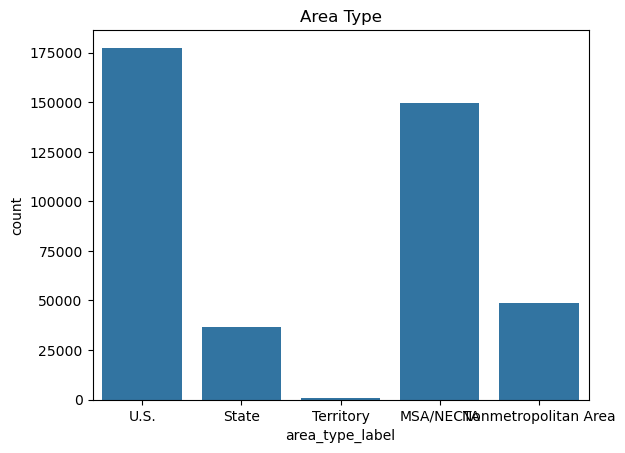

In [83]:
sns.countplot(x='area_type_label', data = df)
plt.title('Area Type')
plt.show()

2) which ownership appears the most ?
       I used CHATGPT to arrange this list bc I had to type it all one by one so to save time I copied from excel and asked to create my dictionary
       Now same as before, I named my newe labels, I linked to the OWN_CODE and I mapped the dictionary
   NOTE: the names are to long so they overlap

In [85]:
own_labels = {
    1: 'Federal Government',
    2: 'State Government',
    3: 'Local Government',
    123: 'Federal, State, and Local Government',
    235: 'Private, State, and Local Government',
    35: 'Private and Local Government',
    5: 'Private',
    57: 'Private, Local Govt Gambling & Casino Hotels',
    58: 'Private + State & Local Govt Hospitals',
    59: 'Private and Postal Service',
    1235: 'Federal, State, Local + Private Sector'
}


In [87]:
df['own_label'] = df['OWN_CODE'].map(own_labels)


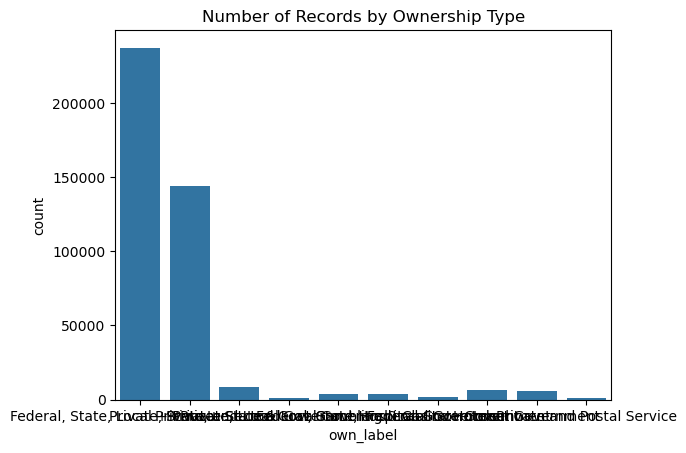

In [89]:
sns.countplot(x ='own_label', data = df)
plt.title('Number of Records by Ownership Type')
plt.show()

3) now is time to get into the 3 categories we are interested in. "Artificial Intelligence, Data Science and Software Development". At the moment I am not able to see what jobs are on the data set, I can only see if there are private or public but that doesn't give me what I need. So I'll display the jobs without repeating them and see what I can get. 

In [91]:
#Unique jobs is going to hold like a sublist of all the jobs in the data set without repeating them 
unique_jobs = df['OCC_TITLE'].unique()


In [93]:
print("There are " + str(len(unique_jobs)) + " unique jobs.")
for job in unique_jobs[:200]:  
    print(job)

#print ("There are" + convert to string the following (length of (unique_jobs)) + ) " unique job titles.")
#For job in = the loop is going through all the jobs one by one, up to 50 or 100, since we have more than 1 thousand jobs, 
#I am gonna select maybe just 100

There are 1138 unique jobs.
All Occupations
Management Occupations
Top Executives
Chief Executives
General and Operations Managers
Legislators
Advertising, Marketing, Promotions, Public Relations, and Sales Managers
Advertising and Promotions Managers
Marketing and Sales Managers
Marketing Managers
Sales Managers
Public Relations and Fundraising Managers
Public Relations Managers
Fundraising Managers
Operations Specialties Managers
Administrative Services and Facilities Managers
Administrative Services Managers
Facilities Managers
Computer and Information Systems Managers
Financial Managers
Industrial Production Managers
Purchasing Managers
Transportation, Storage, and Distribution Managers
Compensation and Benefits Managers
Human Resources Managers
Training and Development Managers
Other Management Occupations
Farmers, Ranchers, and Other Agricultural Managers
Construction Managers
Education and Childcare Administrators
Education and Childcare Administrators, Preschool and Daycare
Edu

There are more the 1,000 jobs and all with different names, I need to filter with key words and create a subset ?
Am i gonna filter ONLY AI, 
Data Science and Software Developmen OR am I gonna find all the related jobst
how can ifilter the data  

I think I am only choosing some specific titles I can see displayed and work with them, I dont relly know how to filter by key words. At the end this is about knowing how to plot and diplay information. I decided to eliminate AI because my regex is very flexible, so they were job titles not related to AI appearing in the list.  

In [153]:
#I choose this 3 jobs to plot, they do not describe the data set as expected but we can now start to work with plots finally
keywords = [
    'Data Scientists',
    'Software Developers', 'Web Developers'
]
pattern = r'Data Scientist[s]?|Software Developer[s]?|Web Developer[s]?'
#This pattern I tried to do it a little more closed and strict but it didn't work so I thats why "AI" is not an option here, I replace it fot "Web developers"

filtered_df = df[df['OCC_TITLE'].str.contains(pattern, case=False, na=False, regex=True)]
#filterd_df is my new varieble. 
#We are gonna look in "df" which is my data set, 
#in the colums OCC TITLE
#From the OCC TITLE, take the .string that .contains
#(the pattern I created, make it no case sensitive, if any Not Available then is False, ans use the regex I specified)

filtered_df.head(20)
#pint the first (20 rows)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,area_type_label,own_label
147,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,15-1250,"Software and Web Developers, Programmers, and ...",...,97.47,"66,930","92,650","127,120","163,610","202,730",NaN,NaN,U.S.,"Federal, State, Local + Private Sector"
149,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,15-1252,Software Developers,...,100.30,"77,020","101,200","132,270","167,540","208,620",NaN,NaN,U.S.,"Federal, State, Local + Private Sector"
151,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,15-1254,Web Developers,...,75.61,"46,850","61,690","84,960","116,370","157,280",NaN,NaN,U.S.,"Federal, State, Local + Private Sector"
164,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,15-2050,Data Scientists,...,88.51,"61,070","79,810","108,020","147,670","184,090",NaN,NaN,U.S.,"Federal, State, Local + Private Sector"
165,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,15-2051,Data Scientists,...,88.51,"61,070","79,810","108,020","147,670","184,090",NaN,NaN,U.S.,"Federal, State, Local + Private Sector"
1545,99,U.S.,1,US,1,"Cross-industry, Private Ownership only","cross-industry, ownership",5,15-1250,"Software and Web Developers, Programmers, and ...",...,97.98,"67,330","94,120","127,970","164,160","203,790",NaN,NaN,U.S.,Private
1547,99,U.S.,1,US,1,"Cross-industry, Private Ownership only","cross-industry, ownership",5,15-1252,Software Developers,...,100.53,"77,330","101,620","132,650","168,000","209,100",NaN,NaN,U.S.,Private
1549,99,U.S.,1,US,1,"Cross-industry, Private Ownership only","cross-industry, ownership",5,15-1254,Web Developers,...,76.19,"46,590","61,510","85,890","118,210","158,480",NaN,NaN,U.S.,Private
1562,99,U.S.,1,US,1,"Cross-industry, Private Ownership only","cross-industry, ownership",5,15-2050,Data Scientists,...,89.42,"61,470","80,510","109,820","150,230","186,000",NaN,NaN,U.S.,Private
1563,99,U.S.,1,US,1,"Cross-industry, Private Ownership only","cross-industry, ownership",5,15-2051,Data Scientists,...,89.42,"61,470","80,510","109,820","150,230","186,000",NaN,NaN,U.S.,Private
